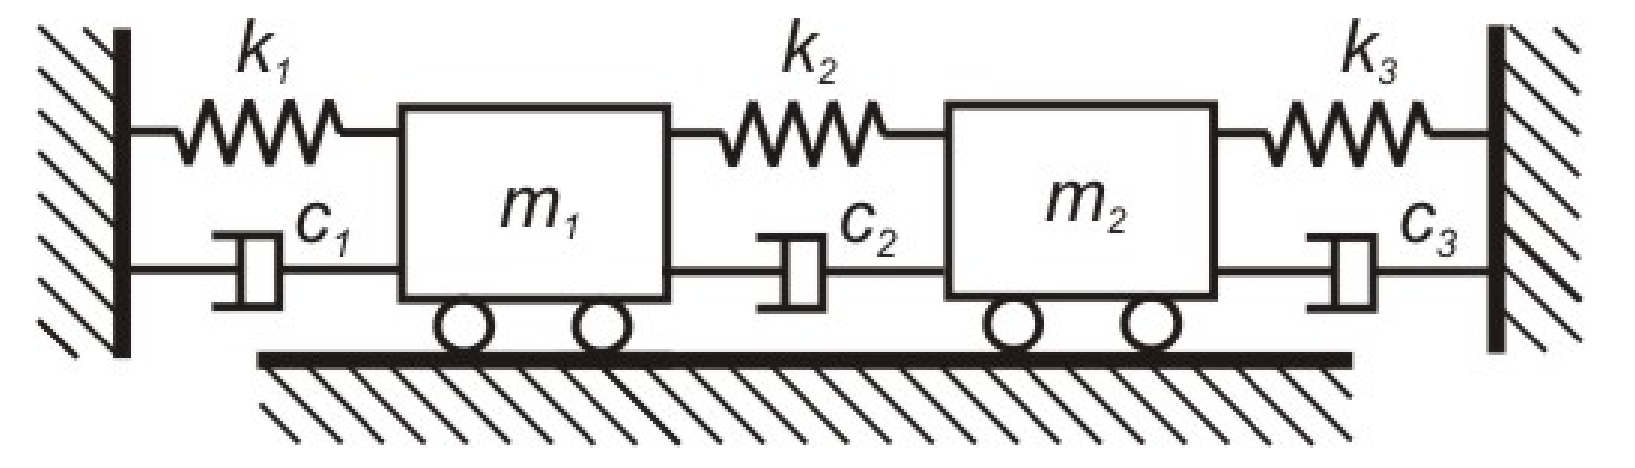

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import *
from IPython.display import display, Latex
from IPython.display import Math
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, mlatex
init_vprinting()

M1 = 2
M2 = 2
C1 = 3
C2 = 1
C3 = 4
K1 = 4000 
K2 = 2000
K3 = 4000

M = sym.Matrix([[M1,0],[0,M2]])
K = sym.Matrix([[K1+K2,-K2],[-K2,K2+K3]])
C = sym.Matrix([[C1+C2,-C2],[-C2,C2+C3]])


Math(rf'M = {sym.latex(M)}')

<IPython.core.display.Math object>

In [2]:
Math(rf'K = {sym.latex(K)}')

<IPython.core.display.Math object>

In [3]:
Math(rf'C = {sym.latex(C)}')

<IPython.core.display.Math object>

Ecuación del movimiento en el dominio del tiempo

In [4]:
x1, x2 = dynamicsymbols('x1 x2')
X = sym.Matrix([[x1],[x2]])

In [5]:
t = sym.Symbol('t')
Xd = X.diff(t,1)
Xdd = X.diff(t,2)
display(Math(latex(M)+mlatex(Xdd)+'+'+latex(C)+mlatex(Xd)+latex(K)+latex(X)+'=F'))

<IPython.core.display.Math object>

Transformada de Laplace

In [6]:
p = sym.Symbol('p')
display(Math('p^2'+latex(M)+'\\textrm{X}(p)'+'+'+'p'+latex(C)+'\\textrm{X}(p)'+'+'+latex(K)+'\\textrm{X}(p)'+'=\\textrm{F}(p)'))

<IPython.core.display.Math object>

Rigidez dinámica

In [7]:
Z11 = M1*p**2+p*(C1+C2)+(K1+K2)
Z12 = -p*C2-K2
Z21 = Z12
Z22 = M2*p**2+p*(C2+C3)+(K2+K3)

Z = sym.Matrix([[Z11,Z12],[Z21,Z22]])
Math(rf'Z = {sym.latex(Z)}')

<IPython.core.display.Math object>

Matriz función de transferencia

In [86]:
Hnum = Z.adjugate()
Hdenom = Z.det()
Hp = Hnum/Hdenom
#display(Math('H(p)='+latex('\fraction{latex(M)}{M}'))
display(Math('H(p)=\\frac{\\textrm{Adj}[Z(p)]}{\\textrm{Det}[Z(p)]}= %s' %sym.latex(sym.simplify(Hp))))


<IPython.core.display.Math object>

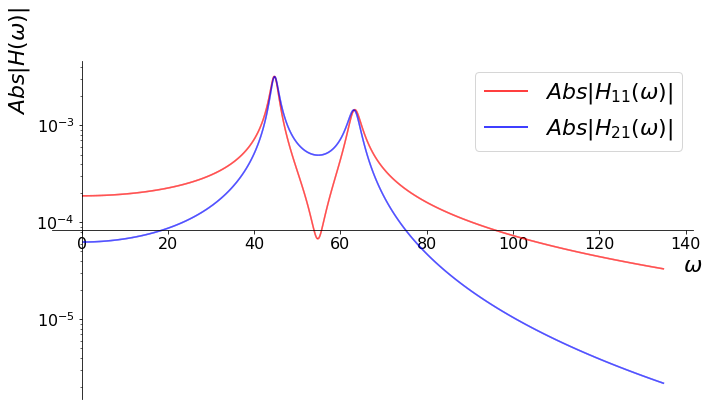

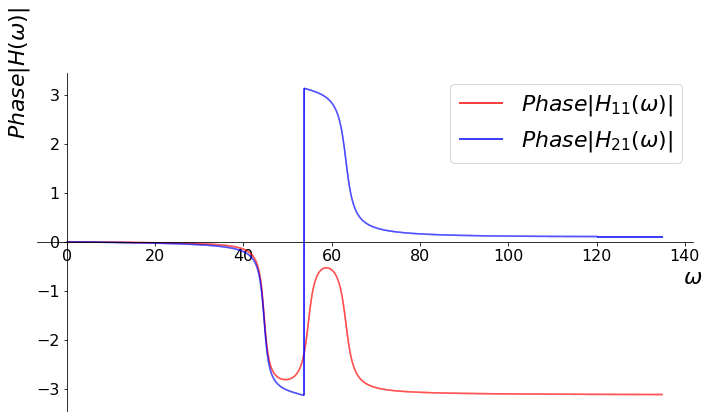

In [479]:
from sympy.plotting import plot
w = sym.Symbol('w')
H11 = Hp[0,0].subs(p, 1j*w)
H21 = Hp[1,0].subs(p, 1j*w)
p2 = plot((sym.Abs(H11), (w, 0, 135)),(sym.Abs(H21), (w, 0, 135)), adaptive =False, nb_of_points=10000, yscale='log', show=False)
p2[0].line_color = 'red'
p2[1].line_color = 'blue'
p2[0].label='$Abs|H_{11}(\omega)|}$'
p2[1].label='$Abs|H_{21}(\omega)|}$'
p2.legend = True
p2.xlabel = '$\omega$'
p2.ylabel = '$Abs|H(\omega)|$'
p2.show()
p1 = plot((sym.arg(H11),(w, 0, 135)),(sym.arg(H21),(w, 0, 135)), adaptive =False, nb_of_points=10000, show=False)
p1[0].line_color = 'red'
p1[1].line_color = 'blue'
p1[0].label='$Phase|H_{11}(\omega)|}$'
p1[1].label='$Phase|H_{21}(\omega)|}$'
p1.xlabel = '$\omega$'
p1.ylabel = '$Phase|H(\omega)|$'
p1.legend = True
p1.show()

In [263]:
zerosm = M*0
A =  sym.Matrix(sym.BlockMatrix([[zerosm,M],[M,C]]))
B =  sym.Matrix(sym.BlockMatrix([[-M,zerosm],[zerosm,K]]))

$$\left(p\left[\begin{array}{cc} 0 & \textbf{M} \\
\textbf{M} & 0\\
\end{array}\right]+\left[\begin{array}{cc} -\textbf{M} & 0 \\
0 & \textbf{K}\\
\end{array}\right]\right)\textrm{Y}(p)=\left[\begin{array}{c} 0 \\ \textrm{F}(p)\end{array}\right] $$

In [10]:
display(Math('p \\cdot A+B=%s' %sym.latex(sym.simplify(p*A+B))))

<IPython.core.display.Math object>

Autovalores y autovectores

In [278]:
#eigvals = list(sym.Matrix.eigenvals(-A.inv()*B).keys())
eigvals,eigenvects = np.linalg.eig(np.array(-A.inv()*B).astype(np.float64))

In [279]:
display(Math('\\Lambda=%s' %sym.latex(sym.Matrix(np.diag(np.array(sym.N(sym.Matrix(eigvals),6))[:,0])))))

<IPython.core.display.Math object>

In [280]:
display(Math('\\lambda_1=%s' %sym.latex(sym.N(eigvals[0],6))))
display(Math('\\lambda_2=%s' %sym.latex(sym.N(eigvals[1],6))))
display(Math('\\lambda_3=%s' %sym.latex(sym.N(eigvals[2],6))))
display(Math('\\lambda_4=%s' %sym.latex(sym.N(eigvals[3],6))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [281]:
lambda1 = sym.N(eigvals[0],6)
lambda2 = sym.N(eigvals[1],6)
lambda3 = sym.N(eigvals[2],6)
lambda4 = sym.N(eigvals[3],6)
modlambda1 = sym.Abs(lambda1)
modlambda2 = sym.Abs(lambda2)
modlambda3 = sym.Abs(lambda3)
modlambda4 = sym.Abs(lambda4)
arglambda1 = sym.N(sym.arg(lambda1)*180/sym.pi,6)
arglambda2 = sym.N(sym.arg(lambda2)*180/sym.pi,6)
arglambda3 = sym.N(sym.arg(lambda3)*180/sym.pi,6)
arglambda4 = sym.N(sym.arg(lambda4)*180/sym.pi,6)
display(Math('\\lambda_1=%s' %sym.latex(modlambda1) + '\\angle %s' %sym.latex(arglambda1)+ '^\\circ%s'))
display(Math('\\lambda_2=%s' %sym.latex(modlambda2) + '\\angle %s' %sym.latex(arglambda2)+ '^\\circ%s'))
display(Math('\\lambda_3=%s' %sym.latex(modlambda3) + '\\angle %s' %sym.latex(arglambda3)+ '^\\circ%s'))
display(Math('\\lambda_4=%s' %sym.latex(modlambda4) + '\\angle %s' %sym.latex(arglambda4)+ '^\\circ%s'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [462]:
display(Math('\\omega_1^d=%s' %sym.latex(sym.im(lambda1)) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_2^d=%s' %sym.latex(sym.im(lambda2)) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_3^d=%s' %sym.latex(sym.im(lambda3)) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_4^d=%s' %sym.latex(sym.im(lambda4)) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_1=%s' %sym.latex(modlambda1) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_2=%s' %sym.latex(modlambda2) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_3=%s' %sym.latex(modlambda3) + '\, \\textrm{rad/s} %s'))
display(Math('\\omega_4=%s' %sym.latex(modlambda4) + '\, \\textrm{rad/s} %s'))
display(Math('\\zeta_1=%s' %sym.latex(-sym.re(lambda1)/modlambda1)))
display(Math('\\zeta_2=%s' %sym.latex(-sym.re(lambda2)/modlambda2)))
display(Math('\\zeta_3=%s' %sym.latex(-sym.re(lambda3)/modlambda3)))
display(Math('\\zeta_4=%s' %sym.latex(-sym.re(lambda4)/modlambda4)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

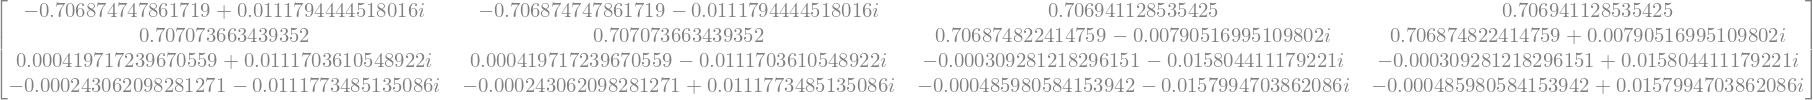

In [295]:
sym.Matrix(eigenvects)

Residuos

In [362]:
Pr = sym.N((1/M.det())/((lambda1-lambda2)*(lambda1-lambda3)*(lambda1-lambda4)),6)
A1 = Pr*sym.N(Hnum.subs(p, lambda1),6)
display(Math('A_1=(%s' %sym.latex(Pr) + ')' + sym.latex(sym.N(Hnum.subs(p, lambda1),6))))
Pr = sym.N((1/M.det())/((lambda2-lambda1)*(lambda2-lambda3)*(lambda2-lambda4)),6)
A2 = Pr*sym.N(Hnum.subs(p, lambda2),6)
display(Math('A_2=(%s' %sym.latex(Pr) + ')' + sym.latex(sym.N(Hnum.subs(p, lambda2),6))))
Pr = sym.N((1/M.det())/((lambda3-lambda1)*(lambda3-lambda2)*(lambda3-lambda4)),6)
A3 = Pr*sym.N(Hnum.subs(p, lambda3),6)
display(Math('A_3=(%s' %sym.latex(Pr) + ')' + sym.latex(sym.N(Hnum.subs(p, lambda3),6))))
Pr = sym.N((1/M.det())/((lambda4-lambda1)*(lambda4-lambda2)*(lambda4-lambda3)),6)
A4 = Pr*sym.N(Hnum.subs(p, lambda4),6)
display(Math('A_4=(%s' %sym.latex(Pr) + ')' + sym.latex(sym.N(Hnum.subs(p, lambda4),6))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

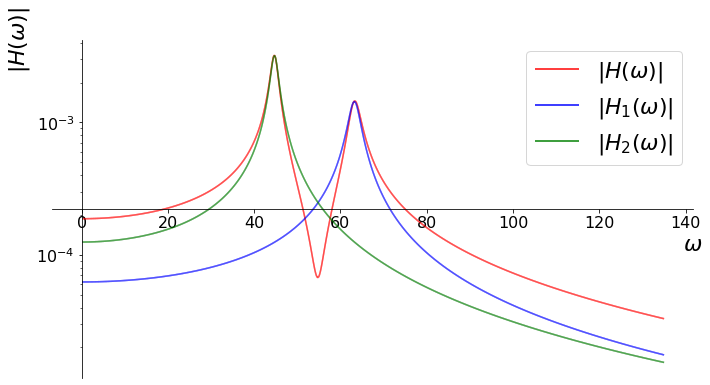

In [466]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 22,
         'axes.titlesize':'x-large',
         'xtick.labelsize': 16,
         'ytick.labelsize': 16,
         'legend.fontsize': 22}
plt.rcParams.update(params)
H1 = A1/(p-lambda1)+A2/(p-lambda2)
H2 = A3/(p-lambda3)+A4/(p-lambda4)
H11M1 = H1[0,0].subs(p, 1j*w)
H11M2 = H2[0,0].subs(p, 1j*w)
p1 = plot((sym.Abs(H11),(w, 0, 135)),(sym.Abs(H11M1),(w, 0, 135)),(sym.Abs(H11M2),(w, 0, 135)), adaptive =False, nb_of_points=10000, yscale='log', show=False)
p1[0].line_color = 'red'
p1[1].line_color = 'blue'
p1[2].line_color = 'green'
p1[0].label='$|H(\omega)|}$'
p1[1].label='$|H_1(\omega)|}$'
p1[2].label='$|H_2(\omega)|}$'
p1.xlabel = '$\omega$'
p1.ylabel = '$|H(\omega)|$'
p1.legend = True
p1.size = (10,5)
p1.show()
# p1.save('Transfer_function.png')

In [426]:
phi1 = np.reshape(np.array(eigenvects[2:,0]),(2,1))
phi2 = np.reshape(np.array(eigenvects[2:,1]),(2,1))
phi3 = np.reshape(np.array(eigenvects[2:,2]),(2,1))
phi4 = np.reshape(np.array(eigenvects[2:,3]),(2,1))

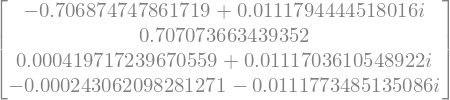

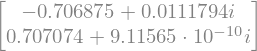

In [365]:
display(sym.Matrix(eigenvects[:,0]))
sym.N(sym.Matrix(phi1)*lambda1,6)

In [422]:
Pr = sym.N((1/M.det())/((lambda1-lambda2)*(lambda1-lambda3)*(lambda1-lambda4)),6)
Prnp = np.array(Pr).astype(np.complex)
Ac = complex(Prnp)*np.array(Hnum.subs(p, lambda1)).astype(np.complex)
ppTi = phi1.dot(phi1.T)
Q1=Ac[0,0]/ppTi[0,0]
display(Math('Q_1 \\cdot \\psi \cdot \\psi^T=(%s' %sym.latex(sym.N(Q1,6)) + ')\cdot' + sym.latex(sym.N(sym.Matrix(ppTi),6))+' ='))
display(Math('= %s' %sym.latex(sym.N(sym.Matrix(Q1*ppTi),6))))
display(Math('A_1 = %s' %sym.latex(sym.N(sym.Matrix(Ac),6))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [428]:
Pr = sym.N((1/M.det())/((lambda1-lambda2)*(lambda1-lambda3)*(lambda1-lambda4)),6)
Prnp = np.array(Pr).astype(np.complex)
Ac = complex(Prnp)*np.array(Hnum.subs(p, lambda1)).astype(np.complex)
ppTi = phi1.dot(phi1.T)
Q1=Ac[0,0]/ppTi[0,0]
display(Math('Q_1=%s'%sym.latex(sym.N(Q1,6))))
Pr = sym.N((1/M.det())/((lambda2-lambda1)*(lambda2-lambda3)*(lambda2-lambda4)),6)
Prnp = np.array(Pr).astype(np.complex)
Ac = complex(Prnp)*np.array(Hnum.subs(p, lambda2)).astype(np.complex)
ppTi = phi2.dot(phi2.T)
Q2=Ac[0,0]/ppTi[0,0]
display(Math('Q_2=%s'%sym.latex(sym.N(Q2,6))))
Pr = sym.N((1/M.det())/((lambda3-lambda1)*(lambda3-lambda2)*(lambda3-lambda4)),6)
Prnp = np.array(Pr).astype(np.complex)
Ac = complex(Prnp)*np.array(Hnum.subs(p, lambda3)).astype(np.complex)
ppTi = phi3.dot(phi3.T)
Q3=Ac[0,0]/ppTi[0,0]
display(Math('Q_3=%s'%sym.latex(sym.N(Q3,6))))
Pr = sym.N((1/M.det())/((lambda4-lambda1)*(lambda4-lambda2)*(lambda4-lambda3)),6)
Prnp = np.array(Pr).astype(np.complex)
Ac = complex(Prnp)*np.array(Hnum.subs(p, lambda4)).astype(np.complex)
ppTi = phi4.dot(phi4.T)
Q4=Ac[0,0]/ppTi[0,0]
display(Math('Q_4=%s'%sym.latex(sym.N(Q4,6))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>